# Gutenberg-Richter Earthquake Recurrence Model

The frequency of earthquakes generated by seismic sources defines the earth-
quake recurrence model. For a certain magnitude (m*), the
earthquake recurrence model gives the mean yearly number of earthquakes
exceeding m*. The pioneering study by Gutenberg and Richter (1944) proposed
the simplest, nevertheless very useful, earthquake recurrence relationship as log(v) = a-b*m
Where,m is magnitude and v is annual rate of exceedance or simply frequency of earthquake occurance.

# Method

The model is created by simple linear regression, where slope and y-intercept represent b and a respectively.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
#importing dataset from csv to dataframe
data = pd.read_csv("Earthquake data.csv")
data.head()


,Magnitude,No of Occurance (M>m*),V
0,4.05,95,0.93
1,4.15,87,0.85
2,4.25,77,0.75
3,4.35,74,0.73
4,4.45,63,0.62


The first and third column represent the magnitude and annual rate of exceedance respectively

In [3]:
#converting data to numpy array 
#magnitude data
m = np.array(data["Magnitude"])

#Annual rate of exceedance data
v = np.array(data["V"])


In [4]:
#following method adds constant to model
M = sm.add_constant(m)

#creating model
model = sm.OLS(v,M)

#printing the model summary
model.fit().summary()


/home/f4h1m/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.81e-09
Time:                        23:30:09   Log-Likelihood:                 16.316
No. Observations:                  18   AIC:                            -28.63
Df Residuals:                      16   BIC:                            -26.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7133      0.205     13.222      0.000       2.278       3.148
x1            -0.4738      0.041    -11.498      0.000      -0.561      -0.386
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.985
Skew:                           0.434   Prob(JB):                        0.611
Kurtosis:                       2.252   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model shows R2 value of 0.892 which is quite significant. The slope is -0.4738 and y-intercept is 2.7133

# Plotting

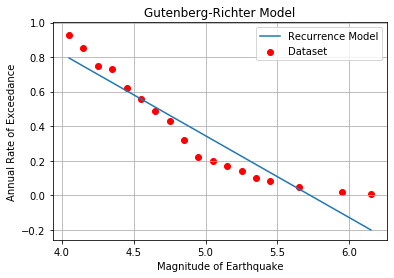

In [5]:
#plotting earthquake data

plt.scatter(m,v,color = "r",label="Dataset")

#plotting model 
plt.plot(m,-0.4738*m+2.7133,label="Recurrence Model")

plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Annual Rate of Exceedance")
plt.title("Gutenberg-Richter Model")
plt.legend()
plt.grid()



The data is collected from "Basic
Earthquake
Engineering" book by Halûk Sucuoğlu